# **Online Retail Analysis - Capstone Project**

# Data Visualisation

## Objectives

- Create clear insightful visualisations
- Key insights and conclusions for each visusalisation
- Hypotheses and t test
- RFM clustering
- overall conclusion
- Suggested solutions for improvements


## Inputs

- The processed dataset can be found [here](..\data_set\processed_data\Processed_Online_Retail.csv)

## Outputs

- Insightful visualisations
- Key insights and conclusions

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project'

Import libraries needed for the project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style('whitegrid')

---

It is crucial in any online retail industry to understand:

- Types of customers they have
- Purchasing habits of customers
- Sales and seasonality
- Popular products
- What can be done in order to improve sales


Identifying and understanding the above allows a business strategy of:

- Customer segmentation: Knowing customer types helps tailor marketing and services to different needs.
- Targeted marketing: Understanding purchasing habits allows for personalised promotions and product recommendations.
- Sales forecasting: Tracking sales patterns and seasonality improves inventory planning and resource allocation.
- Product optimisation: Identifying popular and underperforming products supports smarter inventory decisions and product development.
- Sales growth: Insights from data help shape strategies to boost conversions, customer retention, and overall revenue.

# Load dataset

In [13]:
#load processed data and display

df = pd.read_csv("C:\\Users\\moby1\\Documents\\Capstone-Project\\Online_Retail_Analysis_Capstone_Project\\data_set\\processed_data\\Processed_Online_Retail.csv") 

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Transaction_Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


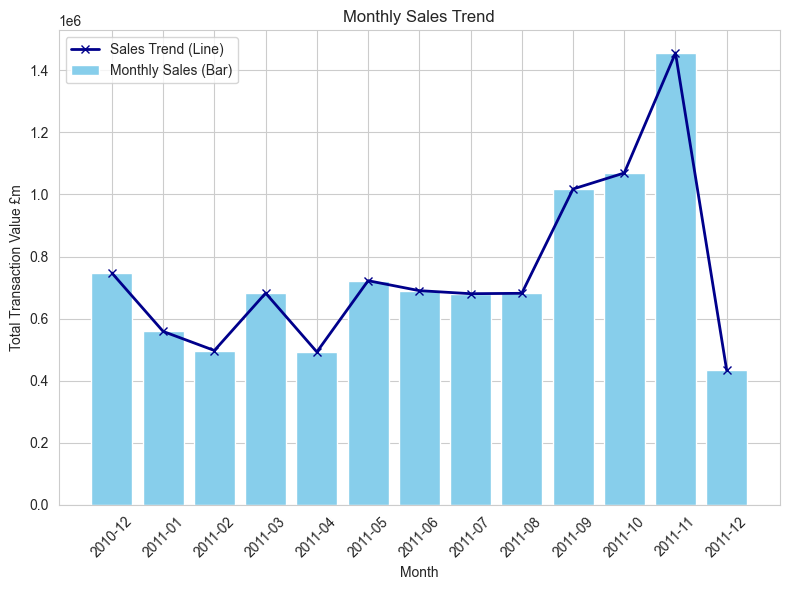

In [17]:
#convert date and create month column
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M').astype(str)

#group by month and sum transactions for each month
monthly_sales = df.groupby('Month')['Total_Transaction_Value'].sum().reset_index()

#create figure and axes
plt.figure(figsize=(8, 6))

#bar chart plot
plt.bar(
    monthly_sales['Month'],
    monthly_sales['Total_Transaction_Value'],
    color='skyblue',
    label='Monthly Sales (Bar)'
)

#line chart plot
plt.plot(
    monthly_sales['Month'],
    monthly_sales['Total_Transaction_Value'],
    color='darkblue',
    marker='x',
    linewidth=2,
    label='Sales Trend (Line)'
)


plt.title('Monthly Sales Trend') #title of plot
plt.xlabel('Month') #label of x axis
plt.ylabel('Total Transaction Value £m') #label of y axis
plt.xticks(rotation=45) # rotation of label for readability
plt.legend()  #add legend for clarity
plt.tight_layout() #adjust layout to prevent overlappying content
plt.show() #display plot

The above chart illustrates the monthly total transaction values from December 2010 through December 2011 (13 months).

# Key insights:

- Post-holiday dip observed in January 2011, likely due to seasonal slowdown after December (Christmas) shopping.
- Flat to modest growth from January to June 2011 (£0.5m to 0.75m), with fluctuations possibly linked to inventory or seasonal cycles.
- Significant spike in sales from September to November 2011, peaking in November (£1.5m) likely driven by pre-holiday promotions and shopping events.
- Sharp drop in December 2011, possibly due to seasonality habits, stock out issues, operational disruptions (logistics and distribution closures and delays).

# Conclusion:

The trend analysis shows a steady sales increase throughout 2011, peaking sharply in Q4, especially November. This is likely due to seasonal promotions such as Black Friday and Christmas. This trend indicates strong year-end performance and highlights opportunities for future seasonal marketing and improved inventory planning.

# Recommendations and Improvements:

- Implement targeted promotions and personalised marketing (loyalty programs) to boost sales during slow months and maintain consistent year-round engagement.
- Improve inventory forecasting and streamline logistics to prevent stockouts and operational delays, especially after peak seasons.
- Diversify revenue streams to reduce reliance on Q4, exploring new markets, products, and sales channels for more stable growth such as subscription/repeat-purchase models.